# Aula 4 - Exercícios - Agregação com Pandas e Conceitos de Estatística
### Consulta a internet (Google, Stackoverflow e etc) liberada!!

In [92]:
# Importe a biblioteca pandas
import pandas as pd
import numpy as np

### 4.1 Escreva uma função para ler os dados de PIB e população dos datasets disponibilizados e retornar um dataframe com a agregação por Estados e as métricas soma, média e mediana do PIB de 2017 e da população de todos os Estados brasileiros.
#### Você pode se basear na sua resolução dos exercícios da Aula 3.


In [88]:
# Dica: Baseie seu código na sua solução do exercício da aula 3 que faz o merge dos
#       datasets do PIB e da população.

def aggregate_pib_pop(path_pop, path_pib):
    """retorne um dataframe com a agregação por Estados e as métricas soma, média, mediana
       e o desvio padrão do PIB de 2017 e da população de todos os Estados brasileiros.
    """
    # YOUR CODE HERE
    df_pib = pd.read_excel(path_pib,skiprows=3, skipfooter=1, dtype={'Unnamed 1': str}).rename( columns={'Unnamed: 1':'IBGE','Unnamed: 2':'municipio_x'} )
    df_pop = pd.read_excel(path_pop,skiprows=0, skipfooter=0 ,dtype={'cod_munic': str, 'cod_uf': str}).rename( columns={'municipio':'municipio_y'} )
    df_pop["IBGE"] = df_pop["cod_uf"] + df_pop["cod_munic"]
    df_pib['IBGE'] = df_pib['IBGE'].astype(str)
    df = df_pib.merge(df_pop, on='IBGE')
    return (df[['uf','pop2017','2017']].groupby(['uf']).agg([('sum', 'sum'),('mean', 'mean'),('median', 'median'),('std', 'std') ] ))
    raise NotImplementedError()


In [87]:
## Faça seus testes aqui
path_pib = '../../curso_ciencia_dados2020/data/originais/pib/pib_municipios.xlsx'
path_pop='../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'
df_pib = pd.read_excel(path_pib,skiprows=3, skipfooter=1, dtype={'Unnamed 1': str}).rename( columns={'Unnamed: 1':'IBGE','Unnamed: 2':'municipio_x'} )
df_pop = pd.read_excel(path_pop,skiprows=0, skipfooter=0 ,dtype={'cod_munic': str, 'cod_uf': str}).rename( columns={'municipio':'municipio_y'} )
df_pop["IBGE"] = df_pop["cod_uf"] + df_pop["cod_munic"]
df_pib['IBGE'] = df_pib['IBGE'].astype(str)
df = df_pib.merge(df_pop, on='IBGE')
df_agg = (df[['uf','pop2017','2017']].groupby(['uf']).agg([('sum', 'sum'),('mean', 'mean'),('median', 'median'),('std', 'std') ] ))
# df_agg = df.agg(a2017sum = ('2017', 'sum'), pop2017_mean = ('2017', 'mean') )
test_data = {('pop2017', 'sum'): 829619.0,  ('pop2017', 'mean'): 37709.954545454544,
             ('pop2017', 'median'): 17903.5, ('pop2017', 'std'): 79035.97564911412,
             ('2017', 'sum'): 14271061.0, ('2017', 'mean'): 648684.5909090909,
             ('2017', 'median'): 229775.0, ('2017', 'std'): 1695166.9475680576}
test_data
df_agg.loc['AC'].to_dict() == test_data
# df
# df[['uf','pop2017','2017']]
# df_agg.loc[['uf','2017']]
# print(df)
# df_agg
# df

True

In [89]:
# Validação para nota
path_pib = '../../curso_ciencia_dados2020/data/originais/pib/pib_municipios.xlsx'
path_pop='../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'
test_data = {('pop2017', 'sum'): 829619.0,  ('pop2017', 'mean'): 37709.954545454544,
             ('pop2017', 'median'): 17903.5, ('pop2017', 'std'): 79035.97564911412,
             ('2017', 'sum'): 14271061.0, ('2017', 'mean'): 648684.5909090909,
             ('2017', 'median'): 229775.0, ('2017', 'std'): 1695166.9475680576}

assert aggregate_pib_pop(path_pop, path_pib).loc['AC'].to_dict() == test_data

### 4.2 Escreva uma função para calcular os percentis [0.25, 0.50, 0.75, 0.9] do dataset do índice de gini dos municípios brasileiros para todos os anos presents no dataset.

#### Apenas por curiosidade, plote o gráfico destes percentis num gráfico de linhas


In [117]:
# Dica 1: Descubra qual a string representa valores NA neste dataset.
# Dica 2: Use o argumento na_values para especificar a string que representa valores NA.
# Dica 3: Use o argumento decimal=',' para definir a vírgula como separador de decimal.
# Dica 4: Use a função apply e uma função lambda para desmembrar a coluna município no
#         respectivo nome e código do município.
# Dica 5: Atente para o separador de colunas do dataset.
# Dica 6: O encoding do dataset do gini é 'utf8'.
# Dica 7: Atente para quantas linhas você deve ignorar antes no inicio e no final do arquivo.

def plot_gini(path_gini):
    """retorne o valor de: n+nn+nnn
    """
    # YOUR CODE HERE
    df = pd.read_csv(path_gini,encoding="utf-8",sep=";",decimal=",",engine="python",header=2,skipfooter=2,na_values=["..."])
    df["cod_ibge6"] = df['Município'].apply(lambda x : x[0:6])
    df["Município"] = df['Município'].apply(lambda x : x[7:])
    return df.quantile([.25, .5, .75, .9])
    raise NotImplementedError()


/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:>

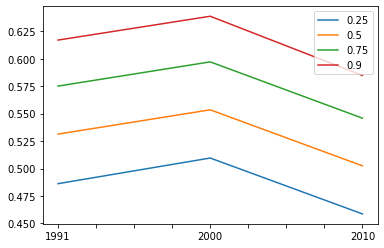

In [119]:
## Faça seus testes aqui
# Considere o seguinte dataframe do PIB dos municípios
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'
df = pd.read_csv(path_gini,encoding="utf-8",sep=";",decimal=",",engine="python",header=2,skipfooter=2,na_values=["..."])
df["cod_ibge6"] = df['Município'].apply(lambda x : x[0:6])
df["Município"] = df['Município'].apply(lambda x : x[7:])
quartis = df.quantile([.25, .5, .75, .9])
quartis.T.plot()

In [118]:
# Validação para nota
test_data = {'1991': {0.25: 0.49, 0.5: 0.53, 0.75: 0.58, 0.9: 0.62},
 '2000': {0.25: 0.51, 0.5: 0.55, 0.75: 0.6, 0.9: 0.64},
 '2010': {0.25: 0.46, 0.5: 0.5, 0.75: 0.55, 0.9: 0.58}}
path_gini = '../../curso_ciencia_dados2020/data/originais/gini/ginibr.csv'

df = plot_gini(path_gini)
assert df.apply(lambda x: round(x, 2)).to_dict() == test_data

### 4.3 Escreva uma função para retornar um dataframe com os nomes das colunas, o total e a porcentagem de valores NA num dataframe passado como argumento para esta função.


In [194]:
# Dica: Use a função concat para concatenar duas séries. Especifique axis=1 para concatenar
#       por colunas. Se quiser dar nome as colunas depois de concatenar, utilize o argumento
#       keys=['Total','Porcentage']

def missing_percentage(df):
    """Retorna um dataframe com os nomes das colunas, o total e a porcentagem de valores
       NA no dataframe
    """
    # YOUR CODE HERE
    return pd.concat([df.isnull().sum(), (100 * df.isnull().sum() / len(df)).round(2)], axis=1, keys=['Total','Porcentagem']).sort_values(by='Total',ascending=False)
    raise NotImplementedError()


In [195]:
## Faça seus testes aqui
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'

df = pd.read_excel(path_titanic)
na_table = pd.concat([df.isnull().sum(), (100 * df.isnull().sum() / len(df)).round(2)], axis=1, keys=['Total','Porcentagem']).sort_values(by='Total',ascending=False)
missing_percentage(df_titanic).to_dict()


{'Total': {'body': 1188,
  'cabin': 1014,
  'boat': 823,
  'home.dest': 564,
  'age': 263,
  'embarked': 2,
  'fare': 1,
  'pclass': 0,
  'survived': 0,
  'name': 0,
  'sex': 0,
  'sibsp': 0,
  'parch': 0,
  'ticket': 0},
 'Porcentagem': {'body': 90.76,
  'cabin': 77.46,
  'boat': 62.87,
  'home.dest': 43.09,
  'age': 20.09,
  'embarked': 0.15,
  'fare': 0.08,
  'pclass': 0.0,
  'survived': 0.0,
  'name': 0.0,
  'sex': 0.0,
  'sibsp': 0.0,
  'parch': 0.0,
  'ticket': 0.0}}

In [142]:
# Validação para nota
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'
test_data = {'Total': {'body': 1188,  'cabin': 1014,  'boat': 823,  'home.dest': 564,
                       'age': 263,  'embarked': 2,  'fare': 1,  'ticket': 0,  'parch': 0,  
                       'sibsp': 0,  'sex': 0,  'name': 0,  'survived': 0,  'pclass': 0},
             'Porcentagem': {'body': 90.76,  'cabin': 77.46,  'boat': 62.87,
                            'home.dest': 43.09,  'age': 20.09,  'embarked': 0.15, 
                            'fare': 0.08,  'ticket': 0.0,  'parch': 0.0,  'sibsp': 0.0,
                            'sex': 0.0,  'name': 0.0,  'survived': 0.0,  'pclass': 0.0}}

df_titanic = pd.read_excel(path_titanic)
assert missing_percentage(df_titanic).to_dict() == test_data

In [ ]:
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'



### 4.4 Escreva uma função para agregar o dataset do Titanic por classe (pclass) e sexo (sex) e calcular a soma da coluna survived (sobrevivente) e a média e mediana da coluna fare (preço do ticket).


In [148]:
def agg_titanic(df_titanic):
    """retorne aagregação do dataframe df_titanic por pclass e sex e calcular a soma 
       da coluna survived e a média e mediana da coluna fare.
    """
    # YOUR CODE HERE
    return df.groupby(['pclass', 'sex']).agg({'survived' : 'sum', 'fare' :['mean', 'median']})
    raise NotImplementedError()


In [147]:
## Faça seus testes aqui
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'
df = pd.read_excel(path_titanic)
grouped = df.groupby(['pclass', 'sex']).agg({'survived' : 'sum', 'fare' :['mean', 'median']})
grouped

survived        fare          
                   sum        mean    median
pclass sex                                  
1      female      139  109.412385  80.92915
       male         61   69.888385  49.50420
2      female       94   23.234827  23.00000
       male         25   19.904946  13.00000
3      female      106   15.324250  10.48960
       male         75   12.415462   7.89580

In [149]:
# Validação para nota
path_titanic = '../../curso_ciencia_dados2020/data/originais/titanic/titanic.xls'
test_data = {('survived', 'sum'): {(1, 'female'): 139,  (1, 'male'): 61,  (2, 'female'): 94,
  (2, 'male'): 25,  (3, 'female'): 106,  (3, 'male'): 75}, ('fare', 'mean'): {(1, 'female'): 109.41238472222216,
  (1, 'male'): 69.88838491620106,  (2, 'female'): 23.234827358490563,  (2, 'male'): 19.90494561403509,
  (3, 'female'): 15.32424953703705,  (3, 'male'): 12.415461991869948}, ('fare', 'median'): {(1, 'female'): 80.92914999999999,
  (1, 'male'): 49.5042,  (2, 'female'): 23.0,  (2, 'male'): 13.0,  (3, 'female'): 10.4896,
  (3, 'male'): 7.8958}}

df_titanic = pd.read_excel(path_titanic)
assert agg_titanic(df_titanic).to_dict() == test_data

### 4.5 Escreva uma função para fazer o merge do dataset de morbidade consolidado com o dataset de população
#### O dataset da população deve ficar a esquerda e o dataset da morbidade a direita no resultado.

In [193]:
def merge_morbidade_pop(path_pop, path_morbidade):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    df_pop = pd.read_excel(path_pop, index_col = 0, dtype = {'cod_uf':str, 'cod_munic': str})
    df_pop["cod_ibge6"] = df_pop["cod_uf"] + df_pop['cod_munic'].apply(lambda x : x[0:4])
    df_morbidade = pd.read_csv(path_morbidade,encoding="utf-8",sep=";",decimal=",",engine="python",header=0,na_values=["-",""], dtype={"cod_ibge6":str})
    return df_pop.merge(df_morbidade,  on = ['cod_ibge6'])
    raise NotImplementedError()


In [177]:
## Faça seus testes aqui
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'

df_pop = pd.read_excel(path_pop, index_col = 0, dtype = {'cod_uf':str, 'cod_munic': str})
df_pop["cod_ibge6"] = df_pop["cod_uf"] + df_pop['cod_munic'].apply(lambda x : x[0:4])
df_pop

df_morbidade = pd.read_csv(path_morbidade,encoding="utf-8",sep=";",decimal=",",engine="python",header=0,na_values=["-",""], dtype={"cod_ibge6":str})
merge  = df_pop.merge(df_morbidade,  on = ['cod_ibge6'])
merge
# df_pop
# df_morbidade

,uf,cod_uf,cod_munic,municipio,pop2017,cod_ibge6,Município,Internações,AIH_aprovadas,Valor_total,...,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,mes,ano,mes_ano
0,RO,11,00015,Alta Floresta D'Oeste,25437,110001,Alta Floresta D'Oeste,149.0,149,101282.26,...,NaN,679.75,679.75,632.0,4.2,8.0,5.37,Abr,2020,2020-04-01
1,RO,11,00015,Alta Floresta D'Oeste,25437,110001,Alta Floresta D'Oeste,86.0,86,42705.09,...,NaN,496.57,496.57,257.0,3.0,2.0,2.33,Jun,2020,2020-06-01
2,RO,11,00015,Alta Floresta D'Oeste,25437,110001,Alta Floresta D'Oeste,133.0,133,119966.00,...,NaN,902.00,902.00,534.0,4.0,2.0,1.50,Mai,2020,2020-05-01
3,RO,11,00015,Alta Floresta D'Oeste,25437,110001,Alta Floresta D'Oeste,197.0,197,91431.64,...,NaN,464.12,464.12,645.0,3.3,3.0,1.52,Mar,2020,2020-03-01
4,RO,11,00015,Alta Floresta D'Oeste,25437,110001,Alta Floresta D'Oeste,197.0,197,93474.87,...,NaN,474.49,474.49,646.0,3.3,2.0,1.02,Fev,2020,2020-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33345,DF,53,00108,Brasília,3039444,530010,Brasília,13103.0,13154,18503747.64,...,NaN,1406.70,1412.18,68293.0,5.2,656.0,5.01,Jun,2020,2020-06-01
33346,DF,53,00108,Brasília,3039444,530010,Brasília,12872.0,12958,15398398.63,...,NaN,1188.33,1196.27,64449.0,5.0,455.0,3.53,Mai,2020,2020-05-01
33347,DF,53,00108,Brasília,3039444,530010,Brasília,16779.0,16854,18324767.35,...,NaN,1087.27,1092.13,95694.0,5.7,572.0,3.41,Mar,2020,2020-03-01
33348,DF,53,00108,Brasília,3039444,530010,Brasília,14566.0,14646,15961151.37,...,NaN,1089.80,1095.78,83460.0,5.7,453.0,3.11,Fev,2020,2020-02-01


In [178]:
# Validação para nota
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'
test_data = {'uf': 'RO', 'cod_uf': '11', 'cod_munic': '00015', 'municipio': "Alta Floresta D'Oeste",
             'pop2017': 25437, 'cod_ibge6': '110001', 'Município': "Alta Floresta D'Oeste",
             'Internações': 149.0, 'AIH_aprovadas': 149, 'Valor_total': 101282.26,
             'Valor_serviços_hospitalares': 77693.11}
df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
assert df_morbidade_pop.iloc[0, 0:11].to_dict() == test_data


### 4.6 Escreva uma função para realizar o agrupamento do dataset de morbidade por UF e por município aplicando a soma sobre as colunas Valor_total, Internações e Dias_permanência. Em seguida calcule, para todos os municípios nesta agregação, o custo médio diário das internações com a seguite fórmula: 
#### custo_medio_diario_intern = Valor_total/Dias_permanência

In [187]:
def custo_medio_internacao_agregado(df_morbidade_pop):
    """retorne o merge dos datasets de população e morbidade.
    """
    # YOUR CODE HERE
    df_agg = df_morbidade_pop.groupby(["uf","cod_ibge6","Município"]).agg({'Valor_total':'sum','Internações':'sum', 'Dias_permanência':'sum'})
    df_agg['custo_medio_diario_intern'] = df_agg['Valor_total'] / df_agg['Dias_permanência']
    return df_agg
    raise NotImplementedError()

In [183]:
# Faça seus testes aqui
df_agg=df_morbidade_pop.groupby(["uf","cod_ibge6","Município"]).agg({'Valor_total':'sum','Internações':'sum', 'Dias_permanência':'sum'})

df_agg['custo_medio_diario_intern']=df_agg['Valor_total']/df_agg['Dias_permanência']
df_agg

    
# pd.options.display.float_format = '{:,.2f}'.format
# path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
# path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'

# df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
# df_morbidade_pop_custo=custo_medio_internacao_agregado(df_morbidade_pop)
# df_morbidade_pop_custo.sort_values("custo_medio_diario_intern",ascending=False, inplace=True)

# #df_morbidade_pop.head(8)

# # 5 maiores custos no pais
# df_morbidade_pop_custo_maiores=df_morbidade_pop_custo.head(5)

# # 5 maiores custos por UF
# #df_morbidade_pop_custo_maiores=df_morbidade_pop_custo.sort_values('custo_medio_diario_intern', ascending=False).groupby('uf').head(5).sort_values(['uf', 'custo_medio_diario_intern'], ascending=True)

# # 5 maiores custos por UF
# #df_morbidade_pop_custo_maiores=df_morbidade_pop_custo.sort_values('custo_medio_diario_intern', ascending=False).groupby('uf').head(5).sort_values(['uf', 'custo_medio_diario_intern'], ascending=True)

# #df_morbidade_pop_custo_maiores[0]

# sns.boxplot(x="Valor_total",y="Município",data=df_morbidade_pop_custo_maiores)

Valor_total  Internações  Dias_permanência  \
uf cod_ibge6 Município                                                    
AC 120001    Acrelândia        200333.42        233.0             989.0   
   120005    Assis Brasil      146578.23        272.0            1023.0   
   120010    Brasiléia         585471.50        699.0            2803.0   
   120013    Bujari            124175.56        107.0             598.0   
   120017    Capixaba          106787.38        150.0             611.0   
...                                  ...          ...               ...   
TO 172120    Tocantinópolis    530979.39        623.0            2792.0   
   172125    Tupirama           38785.90         50.0             182.0   
   172130    Tupiratins         53131.70         49.0             189.0   
   172208    Wanderlândia      200151.81        188.0            1194.0   
   172210    Xambioá           445989.87        577.0            2661.0   

                             custo_medio_diario_intern  
uf cod_ibge6 Município                                  
AC 120001    Acrelândia                     202.561598  
   120005    Assis Brasil                   143.282727  
   120010    Brasiléia                      208.873172  
   120013    Bujari                         207.651438  
   120017    Capixaba                       174.774763  
...                                                ...  
TO 172120    Tocantinópolis                 190.178865  
   172125    Tupirama                       213.109341  
   172130    Tupiratins                     281.120106  
   172208    Wanderlândia                   167.631332  
   172210    Xambioá                        167.602356  

[5570 rows x 4 columns]

In [188]:
# Validação para nota
test_data = {'Valor_total': 200333.41999999998, 'Internações': 233.0, 'Dias_permanência': 989.0,
             'custo_medio_diario_intern': 202.56159757330636}
assert custo_medio_internacao_agregado(df_morbidade_pop).iloc[0].to_dict() == test_data

### 4.7 Escreva uma função para retornar um dataframe cujos valores de uma dada coluna sejam maiores do que um valor passado como argumento (threshold).
#### Para a validação, utilize o threshold=800. Por curiosidade, plote um boxplot dos dados de custo médio de internação agregados.

In [191]:
def get_outliers_morbidade(df_internacoes, col, threshold):
    """retorne um dataframe cujos valores da coluna col sejam maiores que threshold.
    """
    # YOUR CODE HERE
    return df_internacoes.loc[df_internacoes[col] > threshold]
    raise NotImplementedError()

In [190]:
# Faça seus testes aqui
col='custo_medio_diario_intern'
threshold=800
test_data = {'Valor_total': 125334.12, 'Internações': 41.0, 'Dias_permanência': 113.0,
             'custo_medio_diario_intern': 1109.1515044247788}

df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
df_internacoes = custo_medio_internacao_agregado(df_morbidade_pop)
df_internacoes.loc[df_internacoes[col] > threshold]

,,,Valor_total,Internações,Dias_permanência,custo_medio_diario_intern
uf,cod_ibge6,Município,,,,
MT,510620,Nova Brasilândia,125334.12,41.0,113.0,1109.151504
PR,410400,Campina Grande do Sul,14980883.47,2862.0,12045.0,1243.742920
SP,353690,Pedranópolis,481705.94,95.0,488.0,987.102336


In [192]:
# Validação para nota
path_morbidade = '../../curso_ciencia_dados2020/data/originais/morbidade/consolidado/morbidade.csv'
path_pop = '../../curso_ciencia_dados2020/data/originais/populacao/estimativa_dou_2017.xlsx'
col='custo_medio_diario_intern'
threshold=800
test_data = {'Valor_total': 125334.12, 'Internações': 41.0, 'Dias_permanência': 113.0,
             'custo_medio_diario_intern': 1109.1515044247788}

df_morbidade_pop = merge_morbidade_pop(path_pop, path_morbidade)
df_internacoes = custo_medio_internacao_agregado(df_morbidade_pop)

assert get_outliers_morbidade(df_internacoes, col, threshold).iloc[0].to_dict() == test_data